Mejor ruta encontrada: [0, 2, 4, 3, 1]
Distancia total: 142.39964890631947


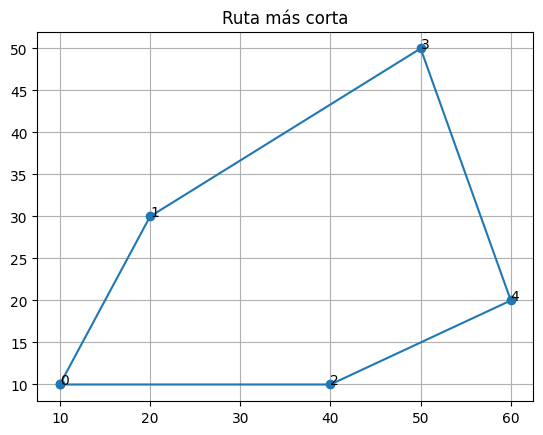

In [ ]:
import matplotlib.pyplot as plt  # Solo para graficar la ruta final

# === Generador de números aleatorios simple  ===
semilla = 1
def mi_random():
    global semilla
    semilla = (semilla * 9301 + 49297) % 233280
    return semilla / 233280

# Devuelve un número entero entre a y b
def randint(a, b):
    return a + int(mi_random() * (b - a + 1))

# Mezcla una lista (como shuffle)
def mezclar(lista):
    for i in range(len(lista)-1, 0, -1):
        j = randint(0, i)
        lista[i], lista[j] = lista[j], lista[i]

# === Crear ciudades con coordenadas fijas (para hacerlo predecible) ===
ciudades = [(10,10), (20,30), (40,10), (50,50), (60,20)]

# === Calcula distancia entre dos ciudades ===
def distancia(ciudad1, ciudad2):
    dx = ciudad1[0] - ciudad2[0]
    dy = ciudad1[1] - ciudad2[1]
    return (dx**2 + dy**2)**0.5

# === Calcula distancia total de una ruta ===
def evaluar(ruta):
    total = 0
    for i in range(len(ruta)):
        a = ciudades[ruta[i]]
        b = ciudades[ruta[(i + 1) % len(ruta)]]  # regresa a la primera ciudad
        total += distancia(a, b)
    return total

# === Crea un individuo (una ruta aleatoria) ===
def crear_individuo():
    ruta = list(range(len(ciudades)))  # [0,1,2,3,4]
    mezclar(ruta)
    return ruta

# === Cruce: toma mitad de padre1 y lo completa con padre2 ===
def cruzar(p1, p2):
    corte = len(p1) // 2
    hijo = p1[:corte]
    for gen in p2:
        if gen not in hijo:
            hijo.append(gen)
    return hijo

# === Mutación: intercambia dos ciudades al azar ===
def mutar(ruta):
    if mi_random() < 0.3:  # 30% de probabilidad
        i = randint(0, len(ruta)-1)
        j = randint(0, len(ruta)-1)
        ruta[i], ruta[j] = ruta[j], ruta[i]

# === Crear población inicial ===
poblacion = [crear_individuo() for _ in range(20)]

# === Algoritmo genético: evolucionar durante 100 generaciones ===
for _ in range(100):
    # Selecciona los 2 mejores individuos
    poblacion.sort(key=evaluar)
    padre1 = poblacion[0]
    padre2 = poblacion[1]

    nueva_poblacion = []
    for _ in range(20):  # Crear nueva generación
        hijo = cruzar(padre1, padre2)
        mutar(hijo)
        nueva_poblacion.append(hijo)
    poblacion = nueva_poblacion

# === Mostrar resultado final ===
mejor = min(poblacion, key=evaluar)
print("Mejor ruta encontrada:", mejor)
print("Distancia total:", evaluar(mejor))

# === Dibujar la ruta encontrada ===
def dibujar(ruta):
    x = [ciudades[i][0] for i in ruta + [ruta[0]]]
    y = [ciudades[i][1] for i in ruta + [ruta[0]]]
    plt.plot(x, y, marker='o')
    for i, (a, b) in enumerate(ciudades):
        plt.text(a, b, str(i))
    plt.title("Ruta más corta")
    plt.grid(True)
    plt.show()

dibujar(mejor)


Este código generado con ayuda de inteligencia artificial resuelve una versión simple del problema del viajero sin usar librerías externas. Utiliza una lógica basada en evolución: genera rutas al azar, mezcla las mejores y las va mejorando con pequeños cambios hasta encontrar una bastante eficiente. Al final, muestra la mejor ruta encontrada y la dibuja.